### 🐼Pandas

Начнем погружение в data science с классики. В данной части домашней работы вы будете исследовать данные о пассажирах Титаника.

https://www.kaggle.com/c/titanic/data

Вам требуется скачать данные и выполнить задания.

In [1]:
import pandas as pd

✅ 1. Откройте в ноутбуке файл с данными ("train.csv") и выведите первые и последние 5 строк датафрейма

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
pd.concat([train.head(5), train.tail(5)])

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


✅ 2. Какой размер имеет датафрейм?

In [3]:
train.shape

(891, 12)

✅ 3. Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived -- категориальный

Pclass -- категориальный

Name -- категориальный (можно отнести к "другое")

Sex -- категориальный

Age -- вещественный          

SibSp -- вещественный         

Parch -- вещественный

Ticket -- другое

Fare -- вещественный         

Cabin -- категориальный     

Embarked -- категориальный

### Задачи для датасета:

1. Так как из вещественных переменных, которые могут быть интересны для предсказания, есть только Fare, то можно сформулировать задачу предсказания цены билета (таргет -- Fare)
2. Можно построить модель бинарной классификации для предсказания вероятности выживания пассажиров (таргет -- Survived)
3. Кластеризация -- найти группы возрастов людей которые с большей вероятностью выжили

✅ 4. Какова доля выживших после крушения:
    - всех пассажиров
    - мужчин
    - женщин?

In [5]:
print('survived:', (train[(train['Survived'] == 1)].count()/train.count())['Survived'])
print('-'*30)
print('male:', (train[(train['Sex'] == 'male') & (train['Survived'])].count()/train[train['Sex'] == 'male'].count())['Survived'])
print('-'*30)
print('female:', (train[(train['Sex'] == 'female') & (train['Survived'])].count()/train[train['Sex'] == 'female'].count())['Survived'])

survived: 0.3838383838383838
------------------------------
male: 0.18890814558058924
------------------------------
female: 0.7420382165605095


✅ 5. Сколько пассажиров ехало в каждом классе?

In [6]:
train.groupby("Pclass")['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

✅ 6. Сколько в среднем пассажиры заплатили за проезд?

In [7]:
train['Fare'].mean()

32.204207968574636

✅ 7. Все ли признаки несут в себе полезную информацию?
    - Избавьтесь от ненужных столбцов, опишите почему вы решили от них избавиться

Убираем PassengerId, Name, Ticket, так как они не отражают никакой сути и бесполезны для анализа выживаемости пассажиров / других закономерностей

In [8]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


✅ 8. Есть ли в данных пропуски? В каких столбцах: сколько пропусков в каждом из них?

<Axes: >

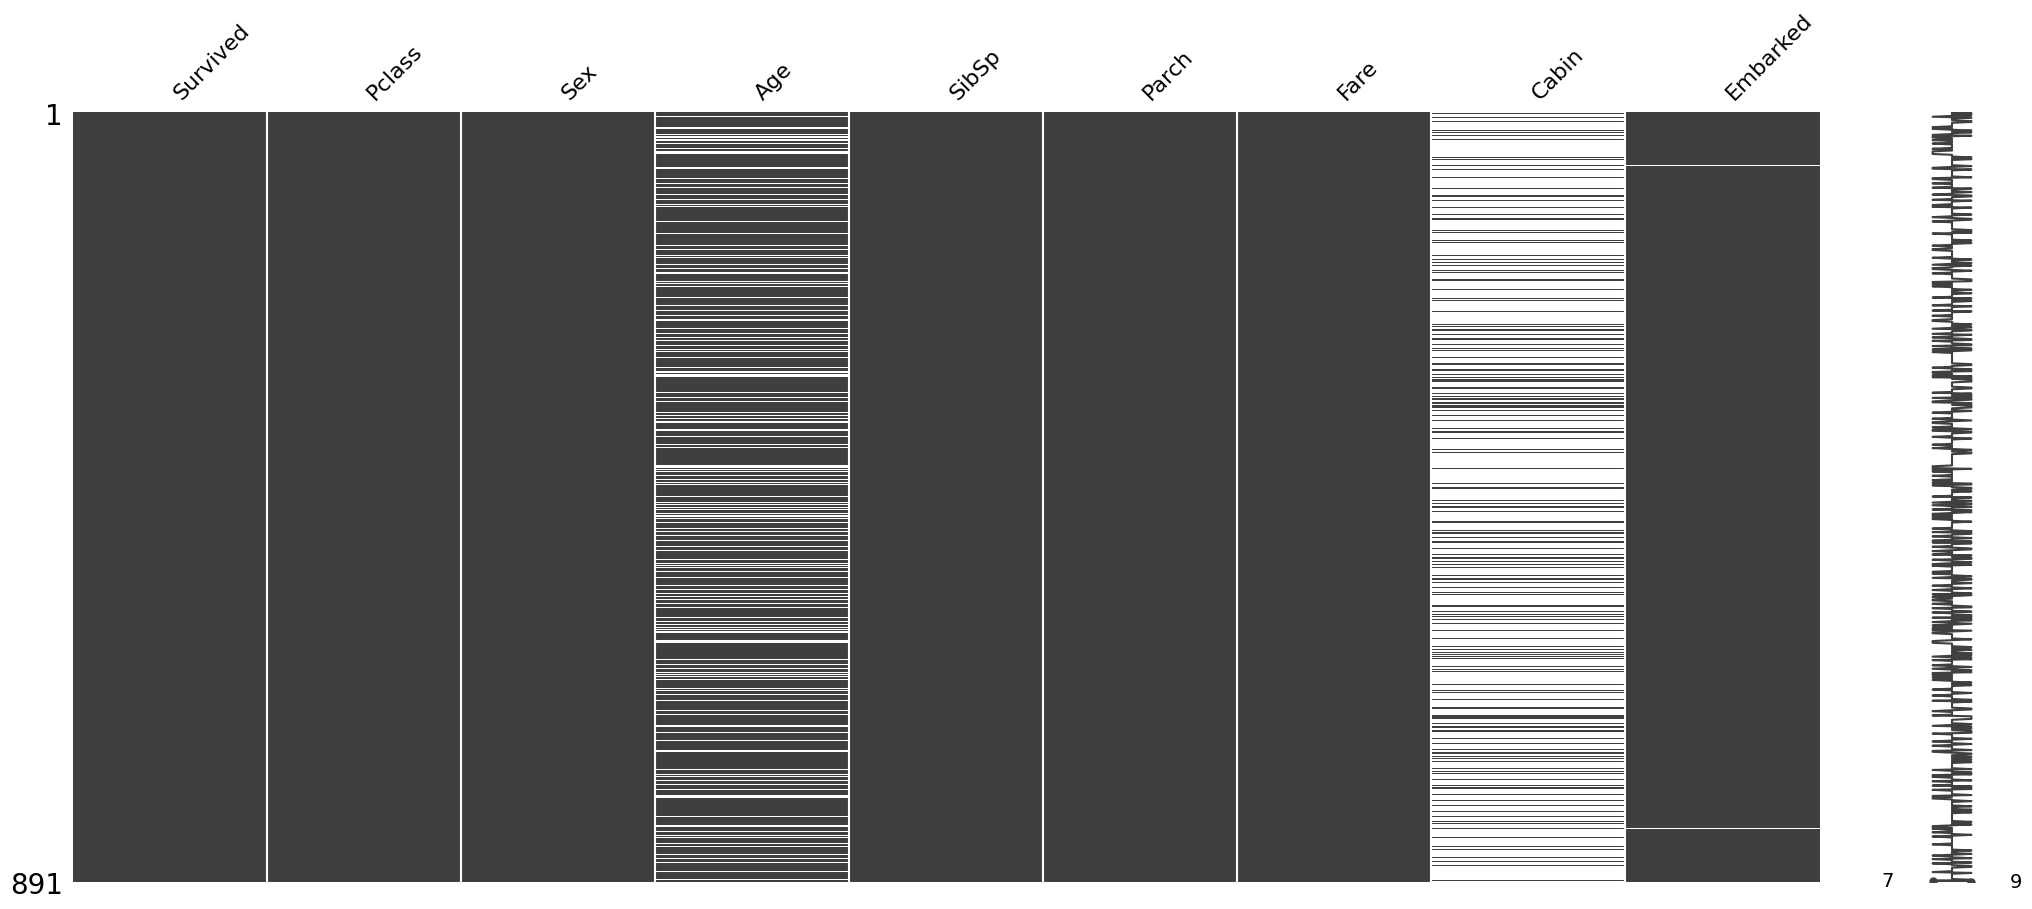

In [9]:
import missingno as msno
msno.matrix(train)

In [10]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

✅ 9. Предположите каким значением стоит заполнить пропуски в каждом столбце в зависимости от его типа. Заполните пропуски и проверьте, что пропусков больше нет.

NaN'ы в Age можно заменить медианным возрастом пассажиров; В кабинах напишем "Unknown"; В случае Embarked можем поставить самый популярный вариант, либо вообще выбросить эти значения, ведь их всего два. Я выберу второй вариант 

In [11]:
value_to_fill = train['Age'].median()
train['Age'] = train['Age'].fillna(value_to_fill)
train['Cabin'] = train['Cabin'].fillna("Unknown")
train = train.dropna(subset=['Embarked'])

train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

✅ 10. Правда ли, что чаще выживали пассажиры с более дорогими билетами?

In [12]:
print(train[train["Survived"] == 1]["Fare"].mean().round(2), train[train["Survived"] == 0]["Fare"].mean().round(2))

48.21 22.12


Как видим, это правда, средняя цена билета выжившего примерно в 2 раза больше, чем средняя цена билета погибшего

✅ 11. Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. 
 - Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого.
 - Придумайте свой признак, который может быть полезен, и добавьте его в таблицу.

При возможности собрать данные хорошим признаком было бы умение плавать, но используя только данные признаки можно придумать признак возрастной группы:

##### 0 - 12 -- дети (Child)

##### 13 - 17 -- подростки (Teen)

##### 18 - 60 -- взрослые (Adult)

##### 60+ -- пожилые (Elderly)

In [13]:
import numpy as np

In [14]:
train["FamMem"] = train["SibSp"] + train["Parch"] + 1 # family members

conditions = [
    train['Age'] < 12,
    (train['Age'] >= 12) & (train['Age'] < 18),
    (train['Age'] >= 18) & (train['Age'] < 60),
    train['Age'] >= 60
]
labels = ['Child', 'Teen', 'Adult', 'Elderly']
train['AgeGroup'] = np.select(conditions, labels, np.nan) # age groups


/tmp/ipykernel_19/2039652070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["FamMem"] = train["SibSp"] + train["Parch"] + 1 # family members
/tmp/ipykernel_19/2039652070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AgeGroup'] = np.select(conditions, labels, np.nan) # age groups


✅ 12. Какая фамилия была самой популярной на корабле?)

In [15]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
xd = df["Name"].str.split(",").str.get(0).describe()
xd

count           891
unique          667
top       Andersson
freq              9
Name: Name, dtype: object

In [16]:
xd['top']

'Andersson'

### 📈Numpy 

In [17]:
import numpy as np

✅ 1. Напишите функцию, возвращающую округленную взвешенную сумму чисел по данным числам и весам к ним. 

In [18]:
def weighted_size_numbers(weights: np.array, marks: np.array) -> int:
    # your code here
    return sum(weights*marks).round()

In [19]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert weighted_size_numbers(weights, marks) == 8

In [20]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert weighted_size_numbers(weights, marks) == 4

✅ 2. Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив array([1.5, 0.5, 2, -4.1, -3, 6, -1]), массив array([1.2, 0.5, 1, -4, 3, 0, -1.2]) и число 0.5, то на выходе должен получиться массив array([0, 1, 3, 6]).

In [21]:
def find_close(array1: np.array, array2: np.array, precision: float) -> np.array:
    # your code here
    return np.array([i for i in range(len(array1)) if abs(array1[i] - array2[i]) <= precision])
    # or
    # return np.arange(array1.size)[abs(array1-array2) <= precision]

In [22]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [23]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

✅ 3. Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [24]:
def diag_prod(matrix: np.array) -> int:
    # your code here
    res = matrix.diagonal()[matrix.diagonal() != 0].prod()
    return res

In [25]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

✅ 4. Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Помните, что в вашем матрице не должно получаться пустых значений nan. 

4* Подумайте, почему могли бы возникнуть пустые значения?)

Из-за того что деление могло быть с целыми числами, поэтому лучше приведем всё в float

In [26]:
def normalize(matrix: np.array) -> np.array:
    #your code here 
    matrix = np.array(matrix, dtype='float')
    return np.divide(matrix - np.mean(matrix, axis=0), np.std(matrix, axis = 0), out = np.zeros(matrix.shape))

In [27]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [28]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

✅ 5. Напишите функцию, вычисляющую косинусную близость двух векторов. Например, если на вход поступают вектора array([-2, 1, 0, -5, 4, 3, -3]) и array([0, 2, -2, 10, 6, 0, 0]), ответом будет -0.25.

In [29]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    # yout code here
    return np.divide(np.dot(vec1, vec2), abs((sum(vec1 ** 2) * sum(vec2 ** 2))**0.5))

In [30]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [31]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)